# Temperature Forecast Prediction
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
##Importing Dataset
df=pd.read_csv("C://Users/Satyam Meena/Desktop/Data Science/Data/Bias_correction_ucl.csv")

In [3]:
#Checking Dataset
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# This is our dataset on which we would do different operations.

Let's check the features present in our data :

In [4]:
#Checking Shape of Dataframe
df.shape

(7752, 25)

We have 23 independent variables and 2 target variables.

In [5]:
#Droping station and Date columns
df=df.drop(['station','Date'],axis=1)

In [6]:
#Checking Datatypes of columns of Dataframe
df.dtypes

Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [7]:
#Checking Nullvalues in the Dataframe
df.isnull().sum()

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
col=['Next_Tmax','Next_Tmin','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']


In [9]:
#Replacing null value in above column by 0
df[col]=df[col].replace(np.nan,0)

#Checking Nullvalues in the Dataframe
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

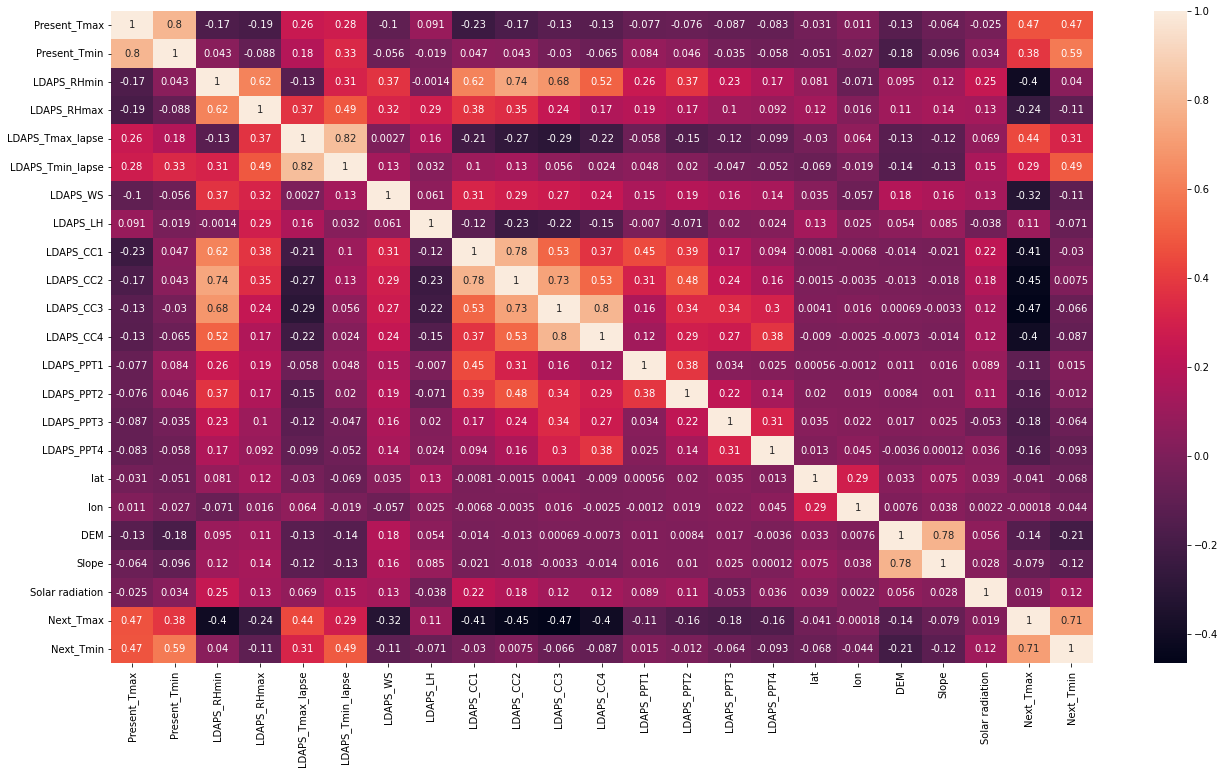

In [10]:
#Checking correlation / Multivariate Analysis
corr=df.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr,annot=True)
plt.show()

In [11]:
#Checking Statistical information
df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,29.499407,23.015338,56.210230,87.519784,29.326939,23.285106,7.029203,61.900288,0.365206,0.352635,...,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.169440,22.852348
std,4.083116,3.256071,15.618676,11.227876,4.123757,3.277967,2.281613,34.120103,0.263668,0.259164,...,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.596114,2.827042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,0.000000,0.000000
25%,27.700000,21.600000,45.735368,84.038809,27.601014,22.032374,5.647741,36.776474,0.141643,0.136090,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,29.900000,23.400000,54.828714,89.699505,29.662273,23.735942,6.531345,56.487289,0.312156,0.309148,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,...,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


<AxesSubplot:>

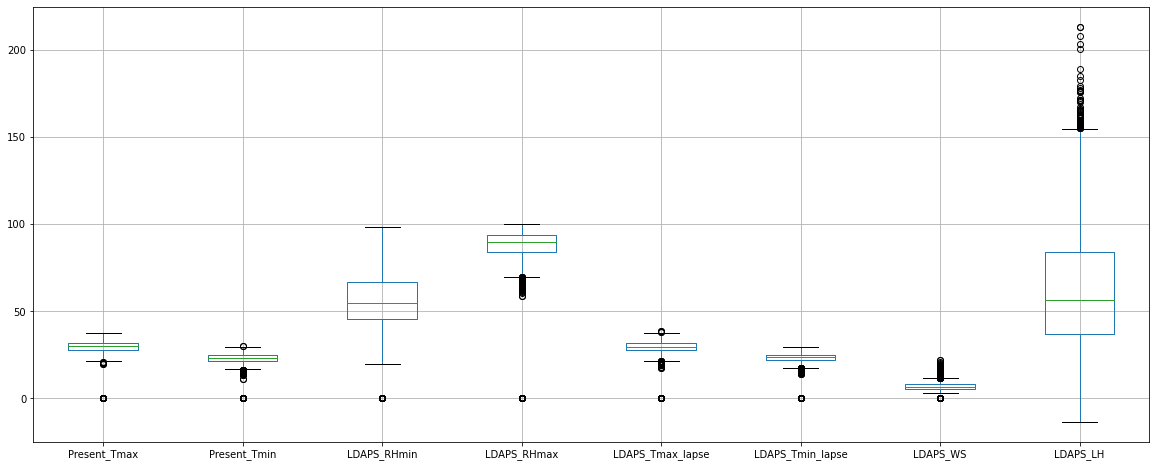

In [12]:
#Checking outliers with Boxplot Graph
df.iloc[:,0:8].boxplot(figsize=[20,8])

<AxesSubplot:>

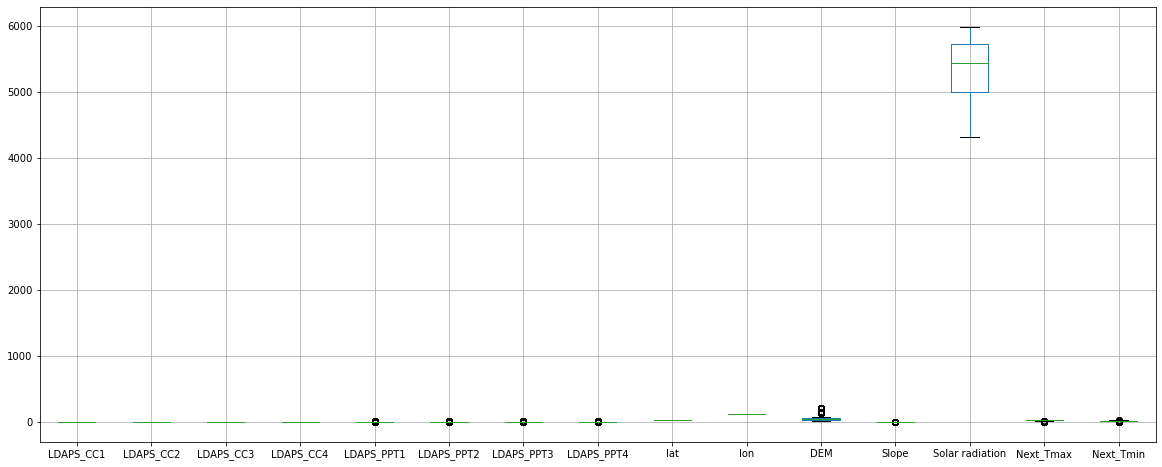

In [13]:
#Checking outliers with Boxplot Graph
df.iloc[:,8::].boxplot(figsize=[20,8])

In [14]:
#Removing outliers
from scipy import stats
z=np.abs(stats.zscore(df))
df_new=(z<3).all(axis=1)
df=df[df_new]

In [16]:
df.shape

(6866, 23)

In [17]:
#X,Y split
X=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
Y=df[['Next_Tmax','Next_Tmin']]

In [18]:
# Checking Skewness
X.skew()

Present_Tmax       -0.304130
Present_Tmin       -0.336394
LDAPS_RHmin         0.319784
LDAPS_RHmax        -0.773671
LDAPS_Tmax_lapse   -0.154633
LDAPS_Tmin_lapse   -0.511902
LDAPS_WS            1.112094
LDAPS_LH            0.566747
LDAPS_CC1           0.588394
LDAPS_CC2           0.504269
LDAPS_CC3           0.691812
LDAPS_CC4           0.711607
LDAPS_PPT1          3.755654
LDAPS_PPT2          4.870457
LDAPS_PPT3          5.546091
LDAPS_PPT4          5.911525
lat                 0.100668
lon                -0.274125
DEM                 1.746218
Slope               1.581789
Solar radiation    -0.519136
dtype: float64

In [19]:
#Some skew values are more than 0.5 and less than -0.5, so we need to improve skewness.

#Improving Skewness
from sklearn.preprocessing import power_transform
pt=power_transform(X, method='yeo-johnson')
X=pd.DataFrame(pt,columns=X.columns)
X.skew()

Present_Tmax       -0.034473
Present_Tmin       -0.019333
LDAPS_RHmin        -0.014019
LDAPS_RHmax        -0.109055
LDAPS_Tmax_lapse   -0.012022
LDAPS_Tmin_lapse   -0.025676
LDAPS_WS            0.008121
LDAPS_LH           -0.032187
LDAPS_CC1           0.064453
LDAPS_CC2           0.050370
LDAPS_CC3           0.093838
LDAPS_CC4           0.143295
LDAPS_PPT1          1.622609
LDAPS_PPT2          1.830116
LDAPS_PPT3          1.997993
LDAPS_PPT4          2.255055
lat                 0.083875
lon                -0.187677
DEM                 0.039703
Slope               0.233316
Solar radiation    -0.175524
dtype: float64

In [20]:
#Importing Libraries required for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [21]:
#Finding Best Random State
max_score=0
random_state=0
for i in range(0,100):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=i,test_size=0.3)
    LR=LinearRegression()
    LR.fit(X_train,Y_train)
    pred=LR.predict(X_test)
    r2score=r2_score(Y_test,pred)
    if max_score<r2score:
        max_score=r2score
        random_state=i
        print('r2score is :',max_score,'random_state is :',random_state)

r2score is : 0.7964914040386185 random_state is : 0
r2score is : 0.7966627094145549 random_state is : 2
r2score is : 0.7999201151691999 random_state is : 3
r2score is : 0.806552373601608 random_state is : 12
r2score is : 0.8071860217468043 random_state is : 18
r2score is : 0.8091064225051674 random_state is : 25


In [22]:
#Our model gives best accuracy of 81% on random state 25.

#Train Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=25,test_size=0.3)

In [23]:
#ML Alogrithms
#Linear Regression
lr=LinearRegression()
lr.fit(X_train,Y_train)
predlr=lr.predict(X_test)
print(r2_score(Y_test,predlr))

0.8091064225051674


In [24]:
#Decision Tree Regression
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
preddtr=dtr.predict(X_test)
print(r2_score(Y_test,preddtr))

0.7399882768111814


In [25]:
#Random Forest Regression
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)
predrfr=rfr.predict(X_test)
print(r2_score(Y_test,predrfr))

0.8938469481060753


In [26]:
#KNeighborsRegression
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
predknn=knn.predict(X_test)
print(r2_score(Y_test,predknn))

0.8646605929678726


# Cross Validation Score

In [27]:
#Linear Regression
from sklearn.model_selection import cross_val_score
scr1=cross_val_score(lr,X,Y,cv=5)
print('Cross Validation Score :', scr1.mean())


Cross Validation Score : 0.7406867993603911


In [28]:
#Decision Tree regression
scr2=cross_val_score(dtr,X,Y,cv=5)
print('Cross Validation Score :', scr2.mean())

Cross Validation Score : 0.44035008020836236


In [29]:
#Random Forest Regression
scr3=cross_val_score(rfr,X,Y,cv=5)
print('Cross Validation Score :', scr3.mean())

Cross Validation Score : 0.7116292134730898


In [30]:
#KNeighborsRegression
scr4=cross_val_score(knn,X,Y,cv=5)
print('Cross Validation Score :', scr4.mean())

Cross Validation Score : 0.5773342372347845


# Hyper Parameter Tuning

In [31]:
#Grid SearchCV
from sklearn.model_selection import GridSearchCV
parameter={'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False], 'n_jobs':np.arange(2,15)}
gcv=GridSearchCV(lr,parameter,cv=5)
gcv.fit(X_train,Y_train)
gcv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'normalize': True}

In [32]:
#Predicting values from Grid SearchCV
predgcv=gcv.best_estimator_.predict(X_test)
r2_score(Y_test,predgcv)

0.8091064225051674

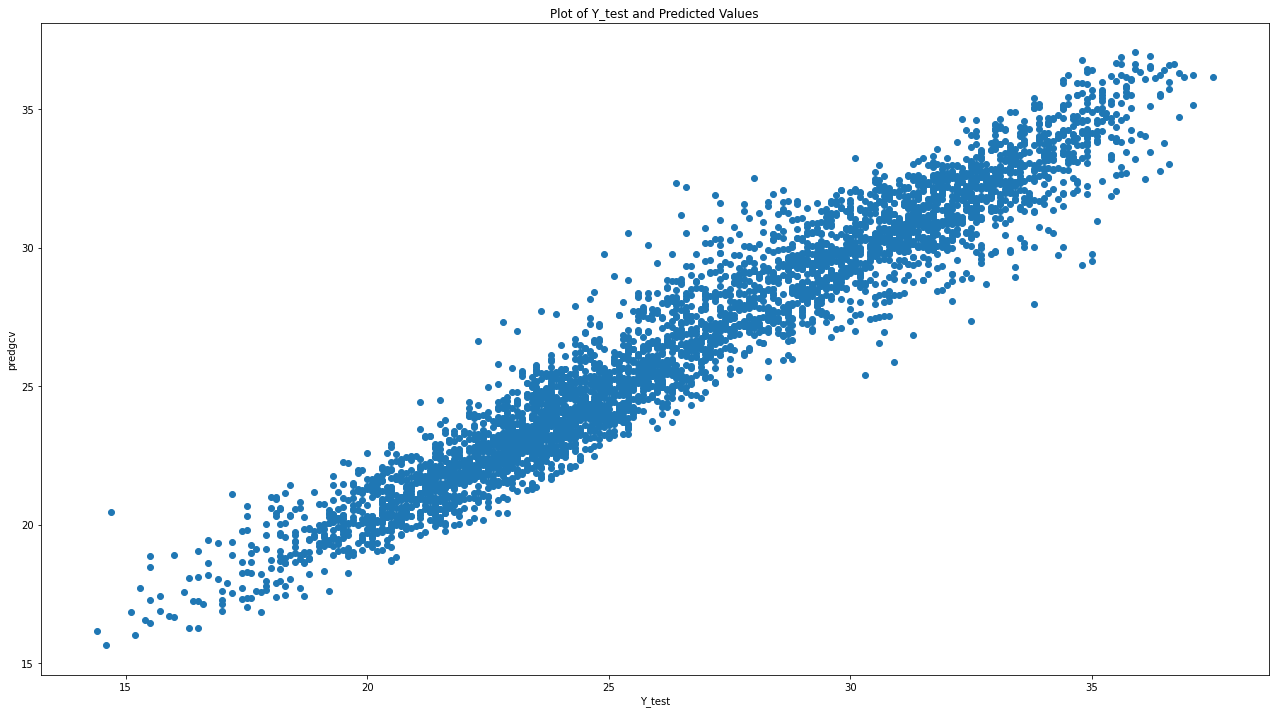

In [33]:
#Plot of Y_test vs Predicted Values
plt.figure(figsize=[22,12])
plt.scatter(Y_test,predgcv)
plt.xlabel('Y_test')
plt.ylabel('predgcv')
plt.title('Plot of Y_test and Predicted Values')
plt.show()

Text(0.5, 1.0, 'Graph of Predicted maximum temperature values and Predicted minimum temperature values')

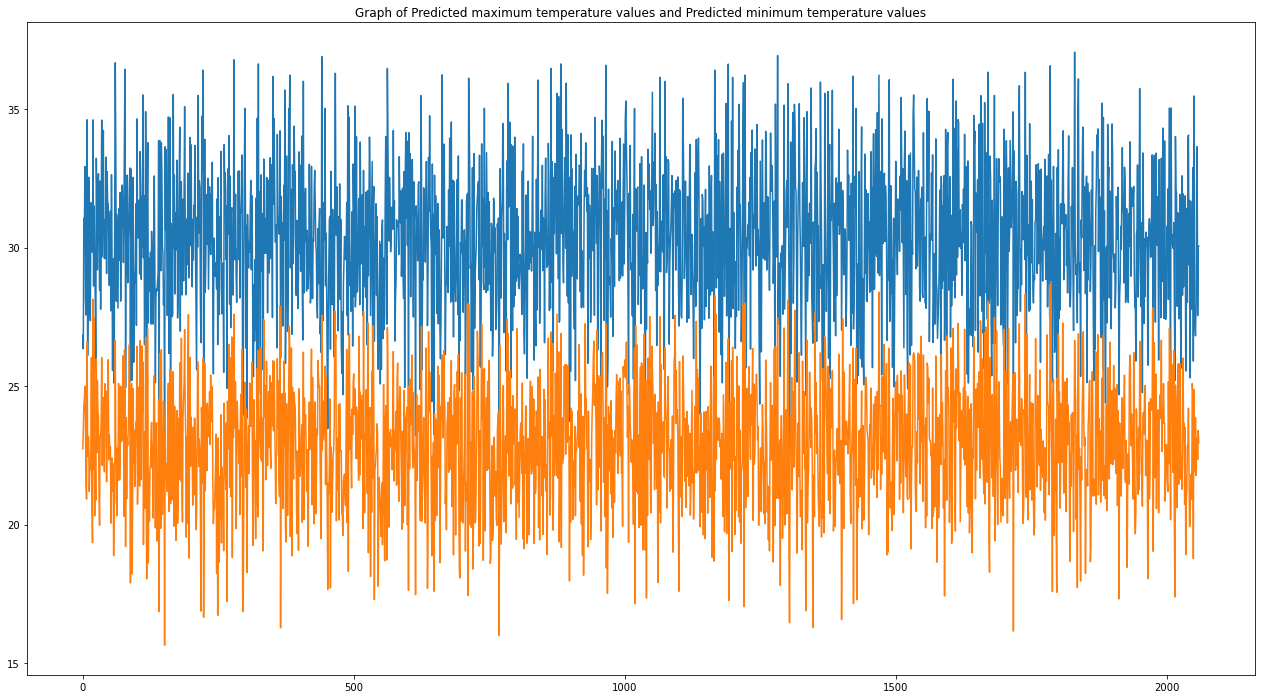

In [34]:
#Plot of Predicted values
plt.figure(figsize=[22,12])
plt.plot(predgcv)
plt.title('Graph of Predicted maximum temperature values and Predicted minimum temperature values')

<AxesSubplot:ylabel='Density'>

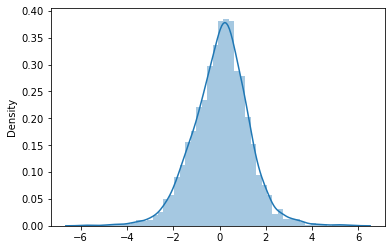

In [35]:
#Plot of Errors
sns.distplot(Y_test-predgcv)

In [36]:
#Saving Model
import joblib
joblib.dump(gcv.best_estimator_,'Temperature_Prediction.pk1')

['Temperature_Prediction.pk1']

# Conclusion:
In this project we observed that Linear Regression is our best fit model with R^2 score of 81% with best parameters. We can notice in our 'predgcv' plot that, range for maximum temperature is around 27 to 35 and range for minimun temperature is around 17 to 26.